In [521]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from scipy.stats import mstats
import statsmodels.api as sm

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [522]:
#Importing the DataSet. 
df = pd.read_csv("florida crimes.csv")

In [523]:
df = df.drop(['Rape\r(legacy\rdefinition)2'], axis=1)

In [524]:
df = df.rename(columns={'Violent\rcrime': 'Violent_Crime', 
                        'Murder and\rnonnegligent\rmanslaughter': 'Murder',
                       'Rape\r(revised\rdefinition)1' : 'Rape',
                       'Aggravated\rassault' : 'Aggravated_Assault',
                       'Property\rcrime': 'Property_Crime',
                       'Larceny-\rtheft': 'Larceny_Theft',
                       'Motor\rvehicle\rtheft': 'Motor_Vehicle_Theft',
                       'Arson3': 'Arson'})

In [525]:
df['Robbery'] = df['Robbery'].str.replace(',', '')
df['Larceny_Theft'] = df['Larceny_Theft'].str.replace(',', '')
df['Property_Crime'] = df['Property_Crime'].str.replace(',', '')
df['Burglary'] = df['Burglary'].str.replace(',', '')
df['Population'] = df['Population'].str.replace(',', '')
df['Aggravated_Assault'] = df['Aggravated_Assault'].str.replace(',', '')
df['Violent_Crime'] = df['Violent_Crime'].str.replace(',', '')
df['Motor_Vehicle_Theft'] = df['Motor_Vehicle_Theft'].str.replace(',', '')

In [526]:
df[['Population','Violent_Crime','Murder','Rape','Robbery',
   'Aggravated_Assault','Property_Crime','Burglary','Larceny_Theft',
   'Motor_Vehicle_Theft','Arson']] = df[['Population','Violent_Crime','Murder','Rape','Robbery',
   'Aggravated_Assault','Property_Crime','Burglary','Larceny_Theft',
   'Motor_Vehicle_Theft','Arson']].apply(pd.to_numeric)

In [527]:
df = df.drop(['City'], axis=1)

In [528]:
df['Murder_Cat'] = np.where(df['Murder']>0, 1, 0)

In [529]:
#Check if there are NA values in the dataset
df.isnull().any()

Population             False
Violent_Crime          False
Murder                 False
Rape                   False
Robbery                False
Aggravated_Assault     False
Property_Crime          True
Burglary               False
Larceny_Theft           True
Motor_Vehicle_Theft    False
Arson                  False
Murder_Cat             False
dtype: bool

In [530]:
#Replacing NA values with 0.
df['Property_Crime']=df['Property_Crime'].fillna(0)
df['Larceny_Theft']=df['Larceny_Theft'].fillna(0)

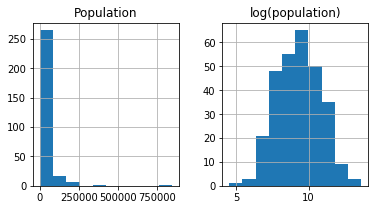

In [531]:
#Log the population variable 
plt.rcParams['figure.figsize'] = (6.0, 3.0)
population = pd.DataFrame({"Population":df["Population"], "log(population)":np.log(df["Population"])})
population.hist(bins = 10)
df['Population'] = np.log(df["Population"])

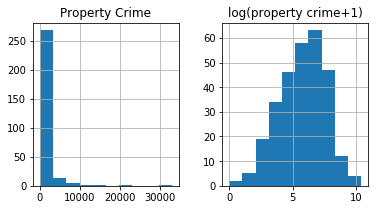

In [532]:
#Log the population crime variable 
plt.rcParams['figure.figsize'] = (6.0, 3.0)
population = pd.DataFrame({"Property Crime":df["Property_Crime"], "log(property crime+1)":np.log1p(df["Property_Crime"])})
population.hist(bins = 10)
df['Property_Crime'] = np.log1p(df["Property_Crime"])

In [538]:
#Comparing Regression Models

In [539]:
#Logistic Regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

lr = LogisticRegression(C=1e9)
y = df['Murder_Cat']
X = df[['Population',
   'Motor_Vehicle_Theft','Robbery','Arson']]

# Declare predictors.
X_statsmod = df[['Population',
   'Motor_Vehicle_Theft','Robbery','Arson']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.431965
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Murder_Cat   No. Observations:                  290
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                            3
Date:                Thu, 21 Dec 2017   Pseudo R-squ.:                  0.3401
Time:                        16:02:41   Log-Likelihood:                -125.27
converged:                       True   LL-Null:                       -189.83
                                        LLR p-value:                 8.336e-28
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Population             -0.2158      0.025     -8.649      0.000      -0.265      -0.167
Mo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [540]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [541]:
#Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.827


In [542]:
#Define the training and test sizes
trainsize = int(df.shape[0]*0.8)  
df_test = df.iloc[trainsize:, :].copy() 
df_train = df.iloc[:trainsize, :].copy()

#Set up regression model to predict defaults using all other variables as features
regr1 = linear_model.LinearRegression()
Y_train = df_train['Murder_Cat'].values.reshape(-1, 1)
X_train = df_train[['Population',
   'Motor_Vehicle_Theft','Robbery','Arson']]
regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))

#Store the parameter estimates.
origparams = np.append(regr1.coef_, regr1.intercept_) 

# Make new features to capture potential quadratic and cubic relationships
# between the features.

df_train['Population_Arson'] = df_train['Population'] * df_train['Arson'] 
df_train['Population_Motor_Vehicle_Theft'] = df_train['Population'] * df_train['Motor_Vehicle_Theft']
df_train['Population_Robbery'] = df_train['Population'] * df_train['Robbery'] 
df_train['Robbery_Arson'] = df_train['Robbery'] * df_train['Arson']
df_train['Motor_Vehicle_Theft_Arson'] = df_train['Motor_Vehicle_Theft'] * df_train['Arson']
df_train['Motor_Vehicle_Theft_Robbery'] = df_train['Motor_Vehicle_Theft'] * df_train['Robbery']
df_train['Arson_Sqrt'] = df_train['Arson'] ** 0.5
df_train['Arson2'] = df_train['Arson'] ** 2
df_train['Arson3'] = df_train['Arson'] ** 3
df_train['Robbery_Sqrt'] = df_train['Robbery'] ** 0.5
df_train['Robbery2'] = df_train['Robbery'] ** 2
df_train['Robbery3'] = df_train['Robbery'] ** 3
df_train['Population_Sqrt'] = df_train['Population'] ** 0.5
df_train['Population2'] = df_train['Population'] ** 2
df_train['Population3'] = df_train['Population'] ** 3

                             
# Re-run the model with the new features.
regrBig = linear_model.LinearRegression()
X_train2 = df_train[['Population','Motor_Vehicle_Theft','Robbery','Arson',
                     'Population_Arson',
                     'Population_Motor_Vehicle_Theft', 'Population_Robbery','Robbery_Arson',
                     'Motor_Vehicle_Theft_Arson','Motor_Vehicle_Theft_Robbery',
                     'Arson_Sqrt','Arson2','Arson3',
                     'Robbery_Sqrt','Robbery2','Robbery3',
                     'Population_Sqrt','Population2','Population3'
                    ]]
regrBig.fit(X_train2, Y_train)
print('\nR-squared complex model:')
print(regrBig.score(X_train2, Y_train))

# Store the new parameter estimates for the same features.
newparams = np.append(
    regrBig.coef_[0,0:(len(origparams)-1)],
    regrBig.intercept_)

print('\nParameter Estimates for the same predictors for the small model '
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)


R-squared simple model:
0.349097436958

R-squared complex model:
0.499718083325

Parameter Estimates for the same predictors for the small model and large model:
[[0.160 8.212]
 [0.000 0.006]
 [-0.000 0.006]
 [0.004 0.028]
 [-1.170 19.134]]


In [543]:
# Test the simpler model with smaller coefficients.
Y_test = df_test['Murder'].values.reshape(-1, 1)
X_test = df_test[['Population',
   'Motor_Vehicle_Theft','Robbery','Arson']]
print('\nR-squared simple model:')
print(regr1.score(X_test, Y_test))

# Test the more complex model with larger coefficients.
df_test['Population_Arson'] = df_test['Population'] * df_test['Arson'] 
df_test['Population_Motor_Vehicle_Theft'] = df_test['Population'] * df_test['Motor_Vehicle_Theft']
df_test['Population_Robbery'] = df_test['Population'] * df_test['Robbery'] 
df_test['Robbery_Arson'] = df_test['Robbery'] * df_test['Arson']
df_test['Motor_Vehicle_Theft_Arson'] = df_test['Motor_Vehicle_Theft'] * df_test['Arson']
df_test['Motor_Vehicle_Theft_Robbery'] = df_test['Motor_Vehicle_Theft'] * df_test['Robbery']
df_test['Arson_Sqrt'] = df_test['Arson'] ** 0.5
df_test['Arson2'] = df_test['Arson'] ** 2
df_test['Arson3'] = df_test['Arson'] ** 3
df_test['Robbery_Sqrt'] = df_test['Robbery'] ** 0.5
df_test['Robbery2'] = df_test['Robbery'] ** 2
df_test['Robbery3'] = df_test['Robbery'] ** 3
df_test['Population_Sqrt'] = df_test['Population'] ** 0.5
df_test['Population2'] = df_test['Population'] ** 2
df_test['Population3'] = df_test['Population'] ** 3


# Re-run the model with the new features.
X_test2 = df_test[['Population','Motor_Vehicle_Theft','Robbery','Arson',
                     'Population_Arson',
                     'Population_Motor_Vehicle_Theft', 'Population_Robbery','Robbery_Arson',
                     'Motor_Vehicle_Theft_Arson','Motor_Vehicle_Theft_Robbery',
                     'Arson_Sqrt','Arson2','Arson3',
                     'Robbery_Sqrt','Robbery2','Robbery3',
                     'Population_Sqrt','Population2','Population3']]
print('\nR-squared complex model:')
print(regrBig.score(X_test2, Y_test))


R-squared simple model:
-0.00969290051794

R-squared complex model:
0.216868486617


In [544]:
# Fitting a ridge regression model. 
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]
print('\nParameter Estimates for the same predictors for the small model and large model')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(compare,
                               formatter = {'float_kind':'{0:.3f}'.format})
print(prettycompare)

0.230609121928
[ 0.03222836  0.00112046 -0.0007426   0.00760875]
0.498478449769

Parameter Estimates for the same predictors for the small model and large model
[[0.032 0.015]
 [0.001 0.004]
 [-0.001 0.006]
 [0.008 0.017]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.771853896224095e-20 / 1.1102230246251565e-16
  RuntimeWarning)


In [545]:
#Print Predictive power
print(ridgeregr.score(X_test, Y_test))
print(ridgeregrBig.score(X_test2, Y_test))

-0.00832105549589
0.158890853124


In [546]:
#Lasso Regression

In [547]:
#Small number of parameters
lass = linear_model.Lasso(alpha=10)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

#Large number of parameters.
lassBig = linear_model.Lasso(alpha=10)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.14471774637

Parameter estimates for the model with few features:
[ 0.          0.00069752  0.          0.          0.28998008]

R² for the model with many features:
0.44361515851

Parameter estimates for the model with many features:
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   8.78686988e-05   3.46361355e-04  -4.55636930e-05
   0.00000000e+00  -4.54951374e-06   0.00000000e+00   0.00000000e+00
   6.77174313e-06   0.00000000e+00  -1.40014837e-06   1.72537923e-09
   0.00000000e+00   0.00000000e+00   2.24947874e-04   1.42606086e-03]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [548]:
#Print Predictive power
print(lass.score(X_test, Y_test))
print(lassBig.score(X_test2, Y_test))

-0.0507830769657
0.0835782771092


In [ ]:
#Logistic Regression was the better model for this binary outcome.
#Ridge would work extremely well for highly correlated features, but in this case this does not seem to be the case.
#Lasso would work well for dealing with extreme number of features.

In [ ]:
#Strengths of Regression
#Useful to identify which variable is related to the dependent variable.
#Useful for predictive analysis.

#Limitations of Regression
#Sensitive to outliers
